![alt text](https://github.com/EnxaisRichard/regressionstarterkit/blob/master/images/blogtitle.PNG?raw=true "Enaxis ML Blog Title")

Are you ready to get some machine learning experience under your belt?

We are in 2017 and every Fortune 500 company are finding ways to leverage machine learning algorithms to future proof and automate their business.  Leading scientists are predicting Moore's Law on the growth for technology will become stale and the shift will move to making machines more smarter to the human race. We see the [effects of machine learning]
(https://www.forbes.com/sites/bernardmarr/2016/09/30/what-are-the-top-10-use-cases-for-machine-learning-and-ai/#63c6398e94c9) escalating to make everyday life more personalized to everyone.  Online shopping recommendation, auto-enhancing selfies, self-driving cars, or even unlocking our phones are driven by machine learning technology.

The concept of learning math and programming at the same time might be an intimidating thought to most, but rest assured, we will only go into high-level concepts here for this "regression" algorithms starter-kit. You might be thinking, what's are regression algorithms used for? Please refer to the diagram below for your quick answer.

![alt text](https://github.com/EnxaisRichard/regressionstarterkit/blob/master/images/ds.png?raw=true "ML Categories")


As Benjamin Franklin always said during his time, “Tell me I forget. Teach me I remember. Involve me I learn.”  So lets focus on predicting numbers in this exercise. We are predicting the "Initial Spread Index" on a [Forest Fire dataset](http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/) provided to us by UC Irvine public datasets. There are a bunch of different regression algorithms out there, but we will just work with three models to get you started on finding the optimal prediction. Again, to keep this kit less intimidating to follow, I wll lightly touch on your typical Data Science procedures, but leave a recommended link for those who seek a more in-depth guide. Afterall, we live in the age where “Googling” is the norm for learning a new subject as soon as possible. 

<a id='toc'></a>
## Table of Content
These are hyperlinks so you can jump to different parts of this tutorial.

## [I. Data Science Environment Setup](#setup)
## [II. Data Ingestion](#ingestion)
## [III. Data Pre-Processing](#preprocessing)
## [IV. Regression Modeling](#regression)

For those interested in copying+pasting the whole code at once, you can find the github repo [here](https://github.com/EnxaisRichard/regressionstarterkit/blob/master/HandsON_Regressions.py)

<a id='setup'></a>
### I. Data Science Environment Setup

Step 1. [Download Anaconda based on your system specification](https://www.anaconda.com/download/).

Step 2. Open Command Prompt from your start menu.

Step 3. Type "jupyter notebook".

Step 4. Create a folder for all your Data Science Experiments.

Step 5. Create a new python 3 file and follow the tutorial below.

> For a more in depth guide, please click [here](https://medium.com/k-folds/setting-up-a-data-science-environment-5e6fd1cbd572).

![alt text](https://github.com/EnxaisRichard/regressionstarterkit/blob/master/images/jupyternotebook_preview.PNG?raw=true "Jupyter Preview")

<a id='ingestion'></a>
### Data Ingestion
[Back to Table of Content](#toc)

#### Importing your python Data Science Libraries.
For any libraries that do not work, go ahead and open command prompt/terminal again and type in "pip install #library name" to download/install python libraries automatically for quick usage.

In [1]:
# <-- By the way, hastags are used to write comments in Python.
#I will be commenting most of the code to give context to what is happening.

#dataframe library, we call it with variable "pd"
import pandas as pd

#matrix and math library, we call it with variable "np"
import numpy as np

#python system libraries to hide warning output for cleaner notebook
import warnings
warnings.filterwarnings('ignore')

#execute and view python code in any IPython IDE
%matplotlib inline

#print produces a written output after executing your code
print("Initial Python libraries are now ready for usage.")
print("-------------------------------------")

Initial Python libraries are now ready for usage.
-------------------------------------


#### Uploading or referencing a dataset
For other different methods of uploading a dataset examples, please click [here](https://chrisalbon.com/python/pandas_dataframe_importing_csv.html).

In [2]:


#assign a variable to the read URL dataset
#dataframe = pd.read_csv(url)
dataframe = pd.read_csv('PiDataSample.csv')

#preview the first 5 rows/index of the dataset
print(dataframe.head(5))
print("-------------------------------------")


         Date     Hours  Concatenate  Treating Pressure  \
0  10/30/2017  21:27:23   430380.894            5414.77   
1  10/30/2017  21:27:24   430380.894            5412.84   
2  10/30/2017  21:27:25   430380.894            5403.03   
3  10/30/2017  21:27:26  430380.8941            5407.02   
4  10/30/2017  21:27:27  430380.8941            5411.08   

   Injection Rate Values  Bottom Hole Sand Concentration  Crosslinker  \
0                  71.32                            1.11        0.000   
1                  71.35                            1.39        0.013   
2                  71.39                            1.65        0.282   
3                  71.40                            1.72        0.646   
4                  71.39                            1.91        1.149   

   FR Data  Gel Data  Surface Sand Concentration  
0      0.0      8.45                        2.62  
1      0.0      8.45                        2.62  
2      0.0      8.46                        2.62  
3 

<a id='preprocessing'></a>
### Data Pre-Processing
[Back to Table of Content](#toc)

Most dataset you work with requires a lot of data cleaning before modeling.  In this exercise, we asssume most of the data have already been cleansed from missing, wrong, duplicates, or out of range data.

For a further in-depth guide to data pre-processing, please refer [here](https://www.analyticsvidhya.com/blog/2016/07/practical-guide-data-preprocessing-python-scikit-learn/)

In [3]:
#preview the data type for each columns
print("Data Types")
print(dataframe.dtypes)
print("-------------------------------------")

#code to summarize statistics of your current dataset BEFORE Label Encoding and Data Scaling
print("Data Statistical Summary")
print(dataframe.describe())
print("-------------------------------------")


#sklearn libraries are the Data Science Gold Standard library for Python
#pre-processing library is used for data preparation
from sklearn.preprocessing import LabelEncoder
#create encoding object to convert categorical value to numeric
encode = LabelEncoder()
#create additional 2 columns to convert category columns (Month & Days) into numeric values
#dataframe['month_code'] = encode.fit_transform(dataframe['month'])
#dataframe['day_code'] = encode.fit_transform(dataframe['day'])

print("Category columns have been encoded for machine learning")
print(dataframe.head(5))
print("-------------------------------------")


Data Types
Date                               object
Hours                              object
Concatenate                        object
Treating Pressure                 float64
Injection Rate Values             float64
Bottom Hole Sand Concentration    float64
Crosslinker                       float64
FR Data                           float64
Gel Data                          float64
Surface Sand Concentration        float64
dtype: object
-------------------------------------
Data Statistical Summary
       Treating Pressure  Injection Rate Values  \
count      149053.000000          149053.000000   
mean         2113.091130              19.783127   
std          1898.432786              29.140481   
min         -3871.790000               0.000000   
25%          1019.550000               0.090000   
50%          1458.660000               0.130000   
75%          3769.010000              20.620000   
max          9327.570000              73.780000   

       Bottom Hole Sand Concentr

Our purpose for statisical summary is to examine our dataset for any unusual outliers or missing data that could throw off our model.

#### Data Visualization - Correlation Plot
There are many creative method to visually analyze your dataset in order to make hypothesis on your prediction. The most commonly used visual for any regression algorithms are correlation plots. 

For more details on other visual methods, please refer [here](http://pbpython.com/simple-graphing-pandas.html)

-------------------------------------


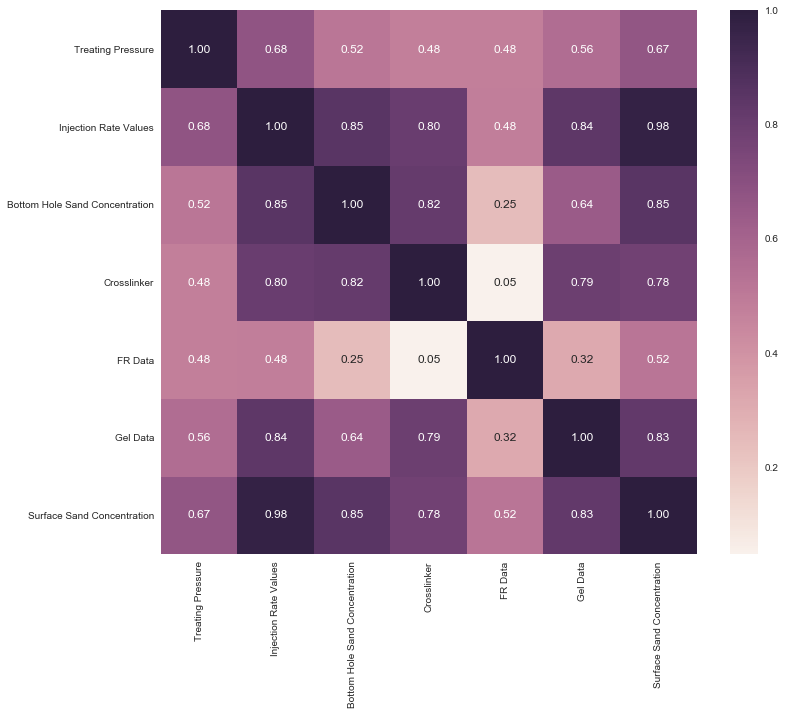

In [4]:
#python math plotting/chart library
import seaborn as sns
import matplotlib.pyplot as plt

#code to plot correlation strength amongst all varaibles/columns
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(dataframe.corr(), annot=True, fmt=".2f")

print("-------------------------------------")

#### Data Scaling/Normalization
It is generally best practice to scale your training dataset from values 0-1. Doing so won't harm your correlation, but allows your models to run faster as well as be more effective with usage of "non-linear" regression models.

Fore more details about data scaling or normalization, please [refer here](https://en.wikipedia.org/wiki/Feature_scaling).

In [5]:
from sklearn.preprocessing import MinMaxScaler
#call scaler function(converting range of value in column from 0-1) from sklearn
scaler = MinMaxScaler()

#filter the dataframe with a variable: train:predictors & target:target

target_column = 'Treating Pressure'
#every column except target column
train = dataframe.loc[:, dataframe.columns != target_column]
target = dataframe[target_column]

print("The predicting variables used are: {}".format(list(train)))
print("-------------------------------------")
print("The target variable we are predicting is: {}".format(target_column))
print("-------------------------------------")


#select only numeric columns for data scaling
train = train.select_dtypes(exclude=['object'])
#apply scaler function to the train or predictors dataset
scaled_train = scaler.fit_transform(train)
print("Training dataset have been scaled from 0 to 1.")

#code to summarize statistics of your current dataset AFTER Label Encoding
scaled_features_df = pd.DataFrame(scaled_train, index=train.index, columns=train.columns)
print(scaled_features_df.describe())
print("-------------------------------------")


The predicting variables used are: ['Date', 'Hours', 'Concatenate', 'Injection Rate Values', 'Bottom Hole Sand Concentration', 'Crosslinker', 'FR Data', 'Gel Data', 'Surface Sand Concentration']
-------------------------------------
The target variable we are predicting is: Treating Pressure
-------------------------------------
Training dataset have been scaled from 0 to 1.
       Injection Rate Values  Bottom Hole Sand Concentration    Crosslinker  \
count          149053.000000                   149053.000000  149053.000000   
mean                0.268137                        0.127018       0.134218   
std                 0.394965                        0.262211       0.294332   
min                 0.000000                        0.000000       0.000000   
25%                 0.001220                        0.000000       0.000000   
50%                 0.001762                        0.000000       0.000000   
75%                 0.279480                        0.000000       0.

#### Data Splitting

It is recommended in Data Science procedure to split your dataset by a large percent chunk for training and use the model created on training set to evaluate it's competency in our remaining test set. In other words, the "math" is built with the train set, and we test our "math" in the test set.  In our example, we will split the training set by 80% and leave the remaining 20% as testing.

![alt text](https://github.com/EnxaisRichard/regressionstarterkit/blob/master/images/splitting_data.PNG?raw=true "Train and Test Datasets")

For more explanation, please refer to this link [here](https://info.salford-systems.com/blog/bid/337783/Why-Data-Scientists-Split-Data-into-Train-and-Test)

In [6]:
from sklearn.cross_validation import train_test_split
#split the dataset into a training set(80% of the data) and test set(20% of the data)
X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size = 0.2)
print("Training dataset have been split and assign to new variables.")
print("@_train set are the 80% of the data.")
print(X_train.shape)
print("@_test set are the remaining 20% of the data.")
print(X_test.shape)
print("-------------------------------------")

Training dataset have been split and assign to new variables.
@_train set are the 80% of the data.
(119242, 6)
@_test set are the remaining 20% of the data.
(29811, 6)
-------------------------------------


C:\Users\Richard\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<a id='regression'></a>
### Regressions Modeling
[Back to Table of Content](#toc)

Lets get to the juicy part and actually apply some machine learning models to our ready splitted dataset.  Most of the algorithms have been packaged by [sklearn](http://scikit-learn.org/stable/) which makes the code application or usage of machine learning easier than you think.

For more details about regression analysis, please refer to the link [here](https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/)

#### Hyper-Parameter Tuning & Cross Validation

##### Hyper-Parameter Tuning
Most machine learning models have a fixed numbers of parameters that can be tuned for a given solution. Finding the optimal combination manually is challenge. Therefore, we automated the parameter search process by running all possible combinations for the best score in a given list(GridSearchCV). 

For a more in-depth guide for hyper-parameter tuning, please refer to the link [here](https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/)


In [7]:
#sklearn libraries for actually preforming machine learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

#python library tool to switch variables for independent loops
import itertools

#Gradient Boost Machine Parameters
gbm_params = {'n_estimators': [50, 100], 
              'max_depth': [1,5,7], 
              'min_samples_split': [2,3,4],
              'learning_rate':[0.01,0.1,0.5,1]}

#Adaboost Parameters
ada_params = {'n_estimators': [50, 100],             
              'base_estimator': [DecisionTreeRegressor(max_depth=1),
                                 DecisionTreeRegressor(max_depth=5), 
                                 DecisionTreeRegressor(max_depth=5)], 
              'learning_rate':[0.01,0.1,0.5,1], 
              'random_state':[88]}

#Random Forest Parameters
rf_params = {'n_estimators': [50, 100], 
              'max_depth': [1,5,7], 
              'min_samples_split': [2,3,4], 
             'random_state':[88]}

print("Regressions' parameters defined.")
print("-------------------------------------")

#Assign Regression object from Sklearn to a variable
gbm_estimator = GradientBoostingRegressor(**gbm_params)
ada_estimator = AdaBoostRegressor(**ada_params)
rf_estimator = RandomForestRegressor(**rf_params)
print("Regression objects assigned to variables.")
print("-------------------------------------")

#Create a cycle for different regression variables to be used in a set loop we will create
reg_names_cycle = ["Gradient Boost Machine Regression", "AdaBoost Regession", "Random Forest Regression"]
reg_params_cycle = [gbm_params, ada_params, rf_params]
reg_estimator_cycle = [gbm_estimator, ada_estimator, rf_estimator]
print("variable cycles aligned and set.")
print("-------------------------------------")



Regressions' parameters defined.
-------------------------------------
Regression objects assigned to variables.
-------------------------------------
variable cycles aligned and set.
-------------------------------------


##### Cross-Validation
[Back to Table of Content](#toc)
To test your model consistent, typically you have to divide your data out K number of times as well as run the model K number of times with different subsets of training and validation datasets each round.

![alt text](https://github.com/EnxaisRichard/regressionstarterkit/blob/master/images/cross-validation.PNG?raw=true "4KFolds Cross-Validation")


For a more in-depth guide for cross-validation, please refer to the link [here](https://www.analyticsvidhya.com/blog/2015/11/improve-model-performance-cross-validation-in-python-r/)

In [8]:
#sklearn libraries for paramter tuning
from sklearn.model_selection import GridSearchCV

#number of regression used
number_of_regressions = 3

#Set a loop to go through each regression
for x in range(number_of_regressions):
    #create variables for each cycle iterations
    current_regression = reg_estimator_cycle[x]
    current_parameters = reg_params_cycle[x]
    current_reg_name = reg_names_cycle[x]
    print("x is {}.".format(reg_names_cycle[x]))
    print("Current_reg_name is {}.".format(current_reg_name))
    print("Current_regression is {}.".format(current_regression))
    print("Current_parameters is {}.".format(current_parameters))
    
    #run through all different parameters setting to find the best score
    current_regression = GridSearchCV(current_regression, current_parameters, verbose=1, cv=4).fit(X_train, y_train)
    
    #provide feature importance for each regression model
    importances = pd.DataFrame({'feature':scaled_features_df.columns,'importance':np.round(current_regression.best_estimator_.feature_importances_,3)})
    importances = importances.sort_values('importance',ascending=False).set_index('feature')
    print(importances)
    print()
    
    #print out best mean cross validation scores
    current_best_cv_score =  current_regression.best_score_
    print("The optimal 4 KFolds Cross Validation Mean score on our training data with a {} is {}".format(current_reg_name, current_best_cv_score))
    print("Using the recommended parameters:")
    print(current_regression.best_params_)
    print()
    
    #run best parameters on training and test data, then assign variables
    current_r2_train_score =current_regression.score(X_train,y_train)
    current_r2_test_score = current_regression.score(X_test,y_test)
    print("The {} provides a Train Data score of: {}".format(current_reg_name, current_r2_train_score))
    print("The {} provides a Test Data score of: {}".format(current_reg_name, current_r2_test_score))
    print("-------------------------------------")
    
    
    #save back to reg_estimator_cycle for scoring later
    reg_estimator_cycle[x] = current_regression
    print("Saved current_regression optimal parameters back to reg_names_cycle variable")
    print("-------------------------------------")

x is Gradient Boost Machine Regression.
Current_reg_name is Gradient Boost Machine Regression.
Current_regression is GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=[0.01, 0.1, 0.5, 1], loss='ls',
             max_depth=[1, 5, 7], max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=[2, 3, 4], min_weight_fraction_leaf=0.0,
             n_estimators=[50, 100], presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False).
Current_parameters is {'n_estimators': [50, 100], 'max_depth': [1, 5, 7], 'min_samples_split': [2, 3, 4], 'learning_rate': [0.01, 0.1, 0.5, 1]}.
Fitting 4 folds for each of 72 candidates, totalling 288 fits


[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed: 23.0min finished


                                importance
feature                                   
Injection Rate Values                0.468
Surface Sand Concentration           0.177
FR Data                              0.129
Gel Data                             0.128
Bottom Hole Sand Concentration       0.061
Crosslinker                          0.038

The optimal 4 KFolds Cross Validation Mean score on our training data with a Gradient Boost Machine Regression is 0.5785147663826713
Using the recommended parameters:
{'learning_rate': 0.5, 'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 100}

The Gradient Boost Machine Regression provides a Train Data score of: 0.5830094993241205
The Gradient Boost Machine Regression provides a Test Data score of: 0.5653769137564023
-------------------------------------
Saved current_regression optimal parameters back to reg_names_cycle variable
-------------------------------------
x is AdaBoost Regession.
Current_reg_name is AdaBoost Regession.
Current_

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:  8.2min finished


                                importance
feature                                   
Injection Rate Values                0.955
FR Data                              0.029
Gel Data                             0.010
Crosslinker                          0.004
Surface Sand Concentration           0.001
Bottom Hole Sand Concentration       0.000

The optimal 4 KFolds Cross Validation Mean score on our training data with a AdaBoost Regession is 0.5536494123871157
Using the recommended parameters:
{'base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'), 'learning_rate': 0.01, 'n_estimators': 50, 'random_state': 88}

The AdaBoost Regession provides a Train Data score of: 0.5532778396276758
The AdaBoost Regession provides a Test Data score of: 0.54070

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:  4.6min finished


                                importance
feature                                   
Injection Rate Values                0.951
FR Data                              0.027
Gel Data                             0.011
Surface Sand Concentration           0.005
Crosslinker                          0.004
Bottom Hole Sand Concentration       0.001

The optimal 4 KFolds Cross Validation Mean score on our training data with a Random Forest Regression is 0.5653727096477974
Using the recommended parameters:
{'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 88}

The Random Forest Regression provides a Train Data score of: 0.5657327207490002
The Random Forest Regression provides a Test Data score of: 0.5516777620300503
-------------------------------------
Saved current_regression optimal parameters back to reg_names_cycle variable
-------------------------------------


#### Evaluation Metric
[Back to Table of Content](#toc)

In this example we will be using the coefficent of determinination to score our model performance. It rates the model from 0-100 percent, making it very easy to interpret.

For more evaluation metric for modeling performance, please check out the link [here](https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/).

In [9]:
#create list of empty arrays for predictions
length_predictions = len(X_test)
gbm_predictions = []
ada_predictions = []
rf_predictions = []

reg_predictions_cycle = [gbm_predictions, ada_predictions, rf_predictions]

for x in range(number_of_regressions):   
    #create variables for each cycle iterations
    current_regression = reg_estimator_cycle[x]
    current_reg_name = reg_names_cycle[x]
    
    #run best parameters on training and test data, then assign variables
    current_r2_train_score =current_regression.score(X_train,y_train)
    current_r2_test_score = current_regression.score(X_test,y_test)
    print("The {} provides a Train Data score of: {}".format(current_reg_name, current_r2_train_score))
    print("The {} provides a Test Data score of: {}".format(current_reg_name, current_r2_test_score))
    
    #assign best parameter predictions
    reg_predictions_cycle[x] = current_regression.predict(X_test)
    print("The {} have been assigned to prediction variable for plotting".format(current_reg_name))
    print("-------------------------------------")
    
    

The Gradient Boost Machine Regression provides a Train Data score of: 0.5830094993241205
The Gradient Boost Machine Regression provides a Test Data score of: 0.5653769137564023
The Gradient Boost Machine Regression have been assigned to prediction variable for plotting
-------------------------------------
The AdaBoost Regession provides a Train Data score of: 0.5532778396276758
The AdaBoost Regession provides a Test Data score of: 0.5407036841131925
The AdaBoost Regession have been assigned to prediction variable for plotting
-------------------------------------
The Random Forest Regression provides a Train Data score of: 0.5657327207490002
The Random Forest Regression provides a Test Data score of: 0.5516777620300503
The Random Forest Regression have been assigned to prediction variable for plotting
-------------------------------------


#### Conclusion
[Back to Table of Content](#toc)

If your accuracy is close to 99% accuracy, you can always assume the model is [overfitted](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/).  Meaning the model is very bias in nature and will be very inaccurate when introduced new data.  Typically, there is a "sweet spot" and it is generally found when your train and test score is close enough (too close indicates [underfitting](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/) to each other.

In [10]:
#we create function to plot actual vs predicted target values
def actual_vs_predicted(predicted_values, regression_names, test_score, train_score, color):   
    plt.figure(figsize=(15,7.5))
    plt.scatter(y_test, predicted_values, color=color, label=regression_names, s=10)
    test_score = np.round(test_score,3)
    train_score = np.round(train_score,3)
    plt.title("{} - Actual vs Predicted with Test r2  Score: {} & Train r2 Score: {}.".format(regression_names, test_score, train_score))
    plt.xlabel("Actual Value")
    plt.ylabel("Predicted Value")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
    plt.legend()
    plt.show()
    
print("function for graph completed")
print("-------------------------------------")

function for graph completed
-------------------------------------


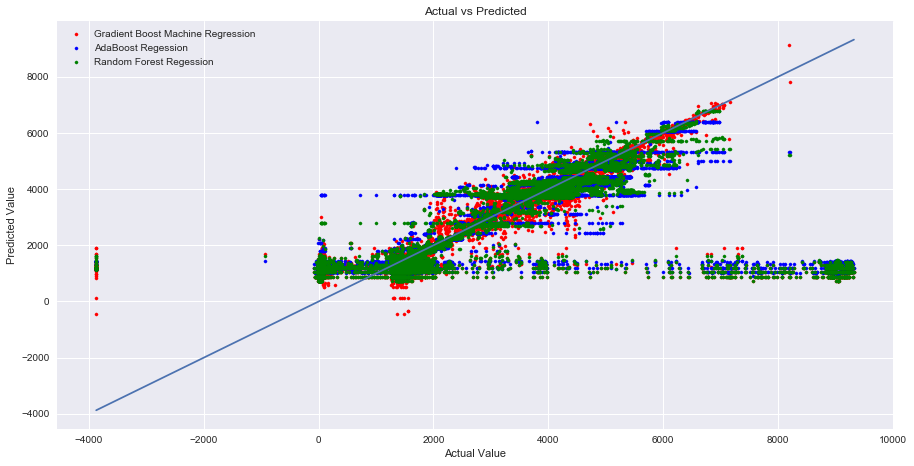

-------------------------------------


In [11]:
#place all variables created through function for plotting actual vs predicted values
plt.figure(figsize=(15,7.5))
plt.scatter(y_test, reg_predictions_cycle[0], color="r", label="Gradient Boost Machine Regression", s=10)
plt.scatter(y_test, reg_predictions_cycle[1], color="b", label="AdaBoost Regession", s=10)
plt.scatter(y_test, reg_predictions_cycle[2], color="g", label="Random Forest Regession", s=10)
plt.title("Actual vs Predicted")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.legend()
plt.show()
print("-------------------------------------")